In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# on est obligé de le faire car notre dataset a pas les noms des colonnes
movie_col_name = ["Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", # Freebase ID:name tuples
    "Movie_countries", # Freebase ID:name tuples
    "Movie_genres"] # Freebase ID:name tuples

char_col_name = ["Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_release_date",
    "Character_name",
    "Actor_date_of_birth",
    "Actor_gender",
    "Actor_height_m", # in meters
    "Actor_ethnicity", # Freebase ID
    "Actor_name",
    "Actor_age_at_movie_release",
    "Freebase_character_actor_map_ID",
    "Freebase_character_ID",
    "Freebase_actor_ID"]

In [13]:
df_movie = pd.read_csv('MovieSummaries/movie.metadata.tsv', delimiter = '\t', names = movie_col_name, header = None)
df_char = pd.read_csv('MovieSummaries/character.metadata.tsv', delimiter = '\t', names = char_col_name, header = None)


In [14]:
print("shape movie:", df_movie.shape)
print("shape char:", df_char.shape)

shape movie: (81741, 9)
shape char: (450669, 13)


<Axes: >

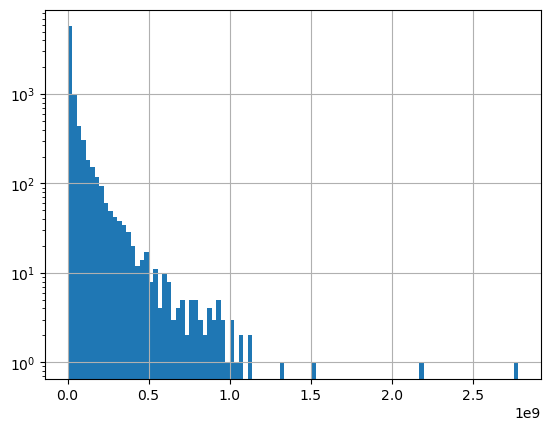

In [15]:
# plot the distribution of the box office revenue
df_movie['Movie_box_office_revenue'].hist(bins = 100, log = True)

In [16]:
print(df_movie.isnull().sum())
print('')
print(df_char.isnull().sum())

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           6902
Movie_box_office_revenue    73340
Movie_runtime               20450
Movie_languages                 0
Movie_countries                 0
Movie_genres                    0
dtype: int64

Wikipedia_movie_ID                      0
Freebase_movie_ID                       0
Movie_release_date                   9995
Character_name                     257875
Actor_date_of_birth                106145
Actor_gender                        45609
Actor_height_m                     295845
Actor_ethnicity                    344611
Actor_name                           1228
Actor_age_at_movie_release         158113
Freebase_character_actor_map_ID         0
Freebase_character_ID              257865
Freebase_actor_ID                     815
dtype: int64


In [17]:
#Actor_date_of_bith : type string, 1935-08-13 AAAA-MM-DD
#Movie_release_date : type string, 2001-08-24 AAAA-MM-DD

In [18]:
common_col = set(movie_col_name) & set(char_col_name) # trois colonnes identiques
print(len(common_col))

3


In [19]:
merged_df = pd.merge(df_movie, df_char, on=['Wikipedia_movie_ID', 'Freebase_movie_ID'], how='inner', suffixes=('', '_y'))
merged_df.shape

(450669, 20)

In [20]:
merged_df['Movie_release_date'] = merged_df['Movie_release_date'].combine_first(merged_df['Movie_release_date_y'])

In [21]:
merged_df.drop('Movie_release_date_y', axis =1, inplace = True, errors='ignore')

print(merged_df.shape)
print(merged_df.columns)
print(merged_df.dtypes)


(450669, 19)
Index(['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name',
       'Movie_release_date', 'Movie_box_office_revenue', 'Movie_runtime',
       'Movie_languages', 'Movie_countries', 'Movie_genres', 'Character_name',
       'Actor_date_of_birth', 'Actor_gender', 'Actor_height_m',
       'Actor_ethnicity', 'Actor_name', 'Actor_age_at_movie_release',
       'Freebase_character_actor_map_ID', 'Freebase_character_ID',
       'Freebase_actor_ID'],
      dtype='object')
Wikipedia_movie_ID                   int64
Freebase_movie_ID                   object
Movie_name                          object
Movie_release_date                  object
Movie_box_office_revenue           float64
Movie_runtime                      float64
Movie_languages                     object
Movie_countries                     object
Movie_genres                        object
Character_name                      object
Actor_date_of_birth                 object
Actor_gender                        object
Ac

In [22]:
merged_df.loc[merged_df['Actor_gender'].isnull(),'Actor_gender'] = 'Unknown'
# on remplace les données de genre par F/M et Unknown quand inconnu. 
#df.loc[mask, colonne] permet de modifier la colonne directement

In [23]:
age_mask = (merged_df['Actor_age_at_movie_release'].isnull()) & (merged_df['Movie_release_date'].notnull()) & (merged_df['Actor_date_of_birth'].notnull())
count_age_incomplete  = merged_df[age_mask].shape[0]
print(count_age_incomplete)
#il y'a 42'858 cas ou l'age est pas donné, mais calculable

42858


In [24]:
merged_df['Movie_release_date'] = pd.to_datetime(merged_df['Movie_release_date'], errors='coerce')
merged_df['Actor_date_of_birth'] = pd.to_datetime(merged_df['Actor_date_of_birth'], errors='coerce')

merged_df.loc[age_mask,'Actor_age_at_movie_release'] = (merged_df['Movie_release_date'] - merged_df['Actor_date_of_birth']).dt.days // 365
# on ajoute l'âge de l'acteur au moment de la sortie comme étant la différence entre sa date de naissance et la date de sortie du film

In [25]:
print(merged_df.isnull().sum())
merged_df.head()

Wikipedia_movie_ID                      0
Freebase_movie_ID                       0
Movie_name                              0
Movie_release_date                 176797
Movie_box_office_revenue           349641
Movie_runtime                       50470
Movie_languages                         0
Movie_countries                         0
Movie_genres                            0
Character_name                     257875
Actor_date_of_birth                120782
Actor_gender                            0
Actor_height_m                     295845
Actor_ethnicity                    344611
Actor_name                           1228
Actor_age_at_movie_release         137082
Freebase_character_actor_map_ID         0
Freebase_character_ID              257865
Freebase_actor_ID                     815
dtype: int64


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_m,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


# Analyse des valeurs manquantes après traitement des données

## Colonne par colonne

1. **`Movie_release_date`**  
   - Il reste encore beaucoup de valeurs manquantes (176 797), et il semble que ce soit un champ critique pour les analyses historiques.
   - Assure-toi de filtrer les films sans date de sortie pour les analyses chronologiques. Tu peux limiter les analyses de tendance dans le temps aux films avec des dates valides et existantes.
   - DONC créer un dataset avec uniquement les données avec dates de sorties.

2. **`Movie_box_office_revenue`**  
   - Bien que les valeurs manquantes aient été réduites, cette colonne reste très incomplète (349 641 valeurs manquantes).
   - Envisage de limiter l'analyse d'impact commercial (succès au box-office) aux films avec des données valides, ou d'utiliser des imputations de moyenne/médiane par genre ou décennie.
   - DONC créer un dataset avec les données nécessaires et uniquement les valeurs complètes

3. **`Movie_runtime`**  
   - Il y a encore environ 50,470 valeurs manquantes. Pour l’analyse sur la durée des films, tu peux imputer ces valeurs avec la moyenne ou la médiane par genre pour garder un maximum de films dans cette analyse.
   - A PRIORI PAS utile pour nous Potentiellement à enlever
  
4. **`Character_name`** et **`Freebase_character_ID`**  
   - Ces deux colonnes ont encore une proportion importante de valeurs manquantes, mais elles ne sont pas critiques pour les analyses de genre, de succès ou de tendances géographiques.
   - POTENTIELLEMENT à enlever
     
5. **`Actor_date_of_birth`** et **`Actor_age_at_movie_release`**  
   - Ces colonnes sont utiles pour une analyse par âge, mais ont encore une quantité notable de valeurs manquantes (120 782 et 137 082, respectivement).
   - Pour des analyses d'âge, tu peux faire des approximations par groupe d'âge ou bien te concentrer sur les enregistrements complets si l'exactitude est prioritaire.
   - PLUS utile ou peut être pour un bonus. 

6. **`Actor_gender`**  
   - Plus aucune valeur manquante ici !
   - J'ai remplacé les données NaN par Unknown. On peut techniquement faire mieux en supposant que des hommes jouent des hommes et des femmes des femmes, et donc avec le nom du personnage retrouver le genre de l'acteur (Mr. Bean, il est probable qu'il était incarné par un homme)
  

7. **`Actor_ethnicity`** et **`Actor_height_m`**  
   - Étant donné les nombreuses valeurs manquantes, les analyses basées sur ces informations (notamment l'ethnicité) risquent de ne pas être fiables avec ce dataset.
   - Mieux vaut éviter d’inclure ces colonnes dans les analyses, à moins d’accepter une marge d’erreur élevée.
   - A enlever ducoup car inutile pour nous et imcomplet 

In [26]:
#ici on créé le dataset final sur lequel nous allons travailler seulement ceux pour lesquels on a la data de sortie du film
merged_df_dr = merged_df[merged_df.Movie_release_date.notnull()]
print(merged_df_dr.isnull().sum())
#merged_df_dr

Wikipedia_movie_ID                      0
Freebase_movie_ID                       0
Movie_name                              0
Movie_release_date                      0
Movie_box_office_revenue           187144
Movie_runtime                       23403
Movie_languages                         0
Movie_countries                         0
Movie_genres                            0
Character_name                     126395
Actor_date_of_birth                 68489
Actor_gender                            0
Actor_height_m                     171764
Actor_ethnicity                    206754
Actor_name                            691
Actor_age_at_movie_release          61379
Freebase_character_actor_map_ID         0
Freebase_character_ID              126385
Freebase_actor_ID                     509
dtype: int64


In [27]:
#ici on créé une nouvelle colonne release year qui contient l
merged_df_dr = merged_df_dr.copy()
merged_df_dr['Movie_release_date'] = merged_df_dr['Movie_release_date'].astype(str)
#print(merged_df_dr['Movie_release_date'].apply(type))
merged_df_dr.loc[:, 'Release_year'] = merged_df_dr['Movie_release_date'].str[:4].astype(int)
#print(merged_df_dr.Movie_release_date.dt.year)
merged_df_dr


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Character_name,Actor_date_of_birth,Actor_gender,Actor_height_m,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450656,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",UN Spacy Commander,NaT,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,1992
450657,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",Silvie Gena,NaT,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,1992
450658,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",Exegran,NaT,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h,1992
450659,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",Elensh,NaT,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992


In [28]:

datafirstplot = merged_df_dr.groupby(["Release_year","Actor_gender"]).Release_year.count()
'''
datafirstplot=datafirstplot.reset_index(name='Count')
datafirstplot.head(20)
'''
datafirstplot = pd.crosstab(merged_df_dr['Release_year'],merged_df_dr['Actor_gender'])
#datafirstplot=datafirstplot.reset_index()
#datafirstplot.index.names=["Index"]
datafirstplot
#plt.plot(datafirstplot.index,datafirstplot.Unknown)

Actor_gender,F,M,Unknown
Release_year,,,
1894,0,1,0
1895,0,1,0
1896,1,1,0
1897,0,1,0
1900,2,2,0
...,...,...,...
2011,4004,7152,384
2012,1959,3554,111
2013,195,478,3


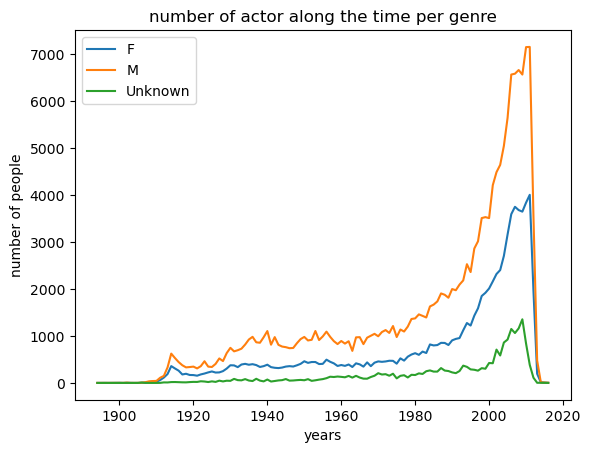

In [29]:
'''
i=0
for index, row in datafirstplot.iterrows():
    plt.plot(datafirstplot.index,datafirstplot.values)
    i=i+1
    print(i)
'''
for column in datafirstplot.columns:
    plt.plot(datafirstplot.index,datafirstplot[column],label=column)
    
plt.xlabel("years")
plt.ylabel("number of people")
plt.title("number of actor along the time per genre")
plt.legend()
plt.show()


In [30]:
import pandas as pd
import ast



# Convertit les chaînes en dictionnaires
merged_df_dr['Movie_genres'] = merged_df_dr['Movie_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Fonction pour extraire le premier genre
def extract_first_genre(genre_dict):
    if isinstance(genre_dict, dict):
        return next(iter(genre_dict.values()), None)
    return None
def extract_all_genres(genre_dict):
    if isinstance(genre_dict, dict):
        # Récupère toutes les valeurs du dictionnaire
        return list(genre_dict.values())
    return None
# Crée une nouvelle colonne 'principal_genre' avec le premier genre
merged_df_dr['principal_genre'] = merged_df_dr['Movie_genres'].apply(extract_first_genre)




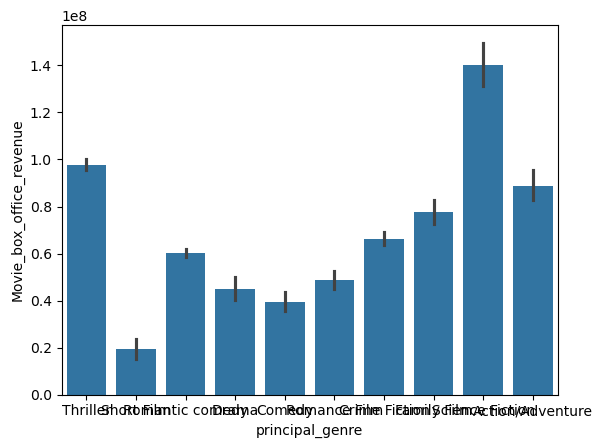

In [31]:
# Get unique genres
#unique_genres = merged_df_dr['principal_genre'].unique().shape()

# Calculate top genres by count or another column, assuming 'count_column' exists
top_genres = merged_df_dr.groupby('principal_genre').size().sort_values(ascending=False).head(10)

barplot_genre_success = sns.barplot(x="principal_genre", y="Movie_box_office_revenue", data=merged_df_dr.loc[merged_df_dr['principal_genre'].isin(top_genres.index)])



In [ ]:
# apply the same to change the type of Movie_countries to be readable (string)
merged_df_dr['Movie_countries'] = merged_df_dr['Movie_countries'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
merged_df_dr['Country'] = merged_df_dr['Movie_countries'].apply(extract_first_genre)

C:\Users\adela\AppData\Local\Temp\ipykernel_14320\517214292.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Count', data=top_countries_df, palette='viridis')


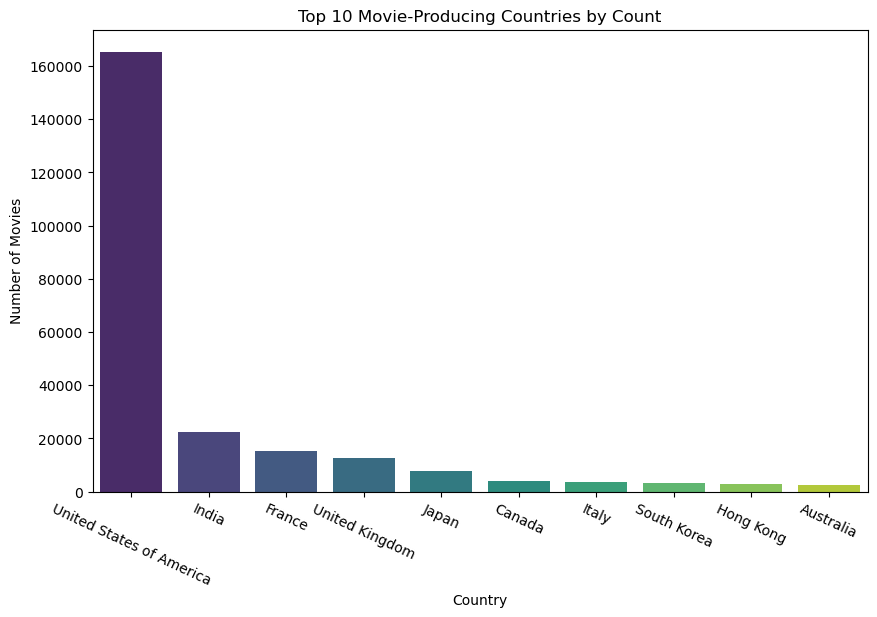

In [51]:
top_countries = merged_df_dr.groupby('Country').size().sort_values(ascending=False).head(10)
# Convert top_countries Series to a DataFrame for easier plotting
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Count']

# Plot the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Count', data=top_countries_df, palette='viridis')
plt.title('Top 10 Movie-Producing Countries by Count')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=-25)
plt.show()

In [33]:
merged_df_dr['Movie_languages'] = merged_df_dr['Movie_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
merged_df_dr['language'] = merged_df_dr['Movie_languages'].apply(extract_first_genre)

In [34]:
merged_df_dr.head(20)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Character_name,...,Actor_height_m,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_map_ID,Freebase_character_ID,Freebase_actor_ID,Release_year,principal_genre,language
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Akooshay,...,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001,Thriller,English Language
1,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Lieutenant Melanie Ballard,...,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001,Thriller,English Language
2,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Desolation Williams,...,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001,Thriller,English Language
3,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Sgt Jericho Butler,...,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001,Thriller,English Language
4,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Bashira Kincaid,...,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001,Thriller,English Language
5,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Commander Helena Braddock,...,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,2001,Thriller,English Language
6,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Whitlock,...,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,2001,Thriller,English Language
7,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Big Daddy Mars,...,NaN,NaN,Richard Cetrone,NaN,/m/0bgchsy,/m/0bgcht0,/m/0bgcht7,2001,Thriller,English Language
8,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Michael Descanso,...,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0,2001,Thriller,English Language
9,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,{'/m/02h40lc': 'English Language'},"{""/m/09c7w0"": ""United States of America""}","{'/m/01jfsb': 'Thriller', '/m/06n90': 'Science...",Uno,...,NaN,NaN,Duane Davis,NaN,/m/0bgchtj,/m/0bgchtm,/m/03nrwdy,2001,Thriller,English Language


In [35]:
#Ici on va créer tout les subdatasets qui nous intéresse
data_boxof = merged_df_dr[merged_df_dr.Movie_box_office_revenue.notnull()]
data_runtime = merged_df_dr[merged_df_dr.Movie_runtime.notnull()]
data_age = merged_df_dr[merged_df_dr.Actor_age_at_movie_release.notnull()]
data_ethn = merged_df_dr[merged_df_dr.Actor_ethnicity.notnull()]
data_height = merged_df_dr[merged_df_dr.Actor_height_m.notnull()]